In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf




[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507525,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404014,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434674,447610800


In [4]:
start = '2010-04-01'
end = '2023-03-31'
df = yf.download('TATASTEEL.NS', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-01,60.594051,62.308975,60.517830,62.137482,20.293346,44671662
2010-04-05,62.423306,64.767036,62.423306,64.643181,21.111675,63183830
2010-04-06,64.929001,66.205666,64.119179,65.510170,21.394825,61411294
2010-04-07,65.738831,66.005592,64.547905,65.324387,21.334150,41024579
2010-04-08,64.786095,70.407234,63.661861,63.952446,20.886087,40836594


In [5]:
df= df.reset_index()

In [7]:
df= df.drop(['Date','Adj Close'], axis=1)
df

,Open,High,Low,Close,Volume
0,60.594051,62.308975,60.517830,62.137482,44671662
1,62.423306,64.767036,62.423306,64.643181,63183830
2,64.929001,66.205666,64.119179,65.510170,61411294
3,65.738831,66.005592,64.547905,65.324387,41024579
4,64.786095,70.407234,63.661861,63.952446,40836594
...,...,...,...,...,...
3206,104.400002,105.500000,104.349998,104.900002,20913844
3207,105.000000,105.050003,101.550003,102.099998,39014278
3208,102.550003,103.400002,102.099998,102.300003,24753289
3209,102.849998,103.099998,102.349998,102.500000,18703734


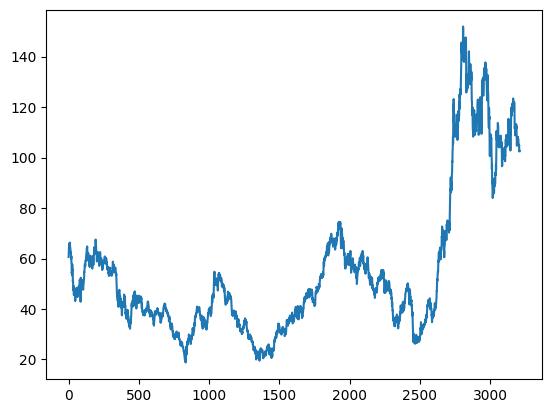

In [8]:
plt.plot(df.Open)

In [17]:
 ma200 =df.Close.rolling(200).mean()
 ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3206    105.474225
3207    105.450475
3208    105.418600
3209    105.408675
3210    105.414825
Name: Close, Length: 3211, dtype: float64

In [13]:
ma100 =df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3206    111.0270
3207    111.0360
3208    111.0465
3209    111.0515
3210    111.0400
Name: Close, Length: 3211, dtype: float64

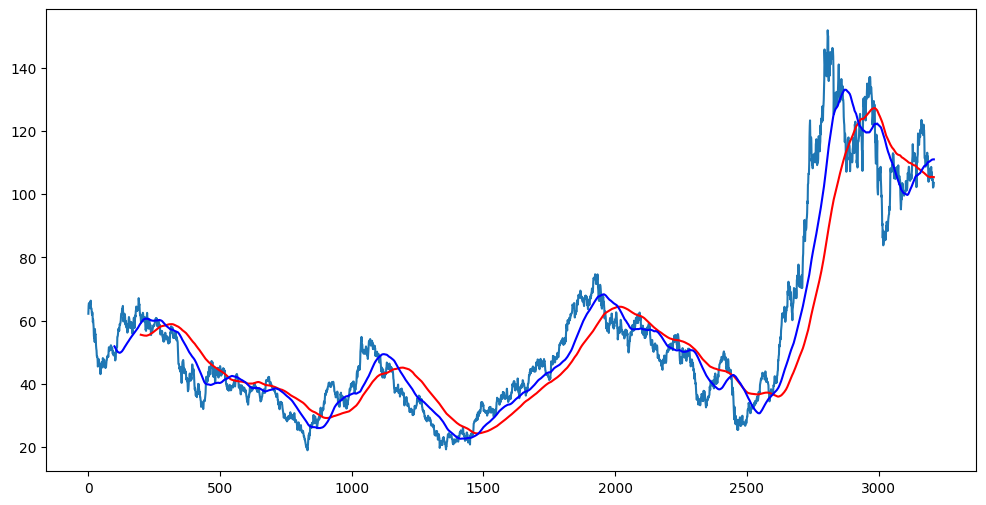

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200, 'r')
plt.plot(ma100, 'b')

TRAINING AND TESTING DATASET

In [20]:
 data_train =pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
 data_test =pd.DataFrame(df['Close'][int(len(df)*0.80): int(len(df))])
 print(data_train.shape)
 print(data_test.shape)

(2568, 1)
(643, 1)


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [22]:
data_train_array=scaler.fit_transform(data_train)
data_train_array

array([[0.77565146],
       [0.82058955],
       [0.83613844],
       ...,
       [0.42346592],
       [0.4267838 ],
       [0.42203114]])

In [24]:
x_train =[]
y_train =[]
for i in range(100, data_train_array.shape[0]):
  x_train.append(data_train_array[i-100:i])
  y_train.append(data_train_array[i,0])
x_train, y_train =np.array(x_train), np.array(y_train)

In [27]:
x_train.shape

(2468, 100, 1)

APPLYING ML MODEL

In [28]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [36]:
model =Sequential()
model.add(LSTM(units=50, activation ='relu', return_sequences =True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=80, activation ='relu', return_sequences =True))
model.add(Dropout(0.3))

model.add(LSTM(units=120, activation ='relu', return_sequences =True))
model.add(Dropout(0.4))

model.add(LSTM(units=150, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [37]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 80)           41920     
                                                                 
 dropout_13 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 120)          96480     
                                                                 
 dropout_14 (Dropout)        (None, 100, 120)          0         
                                                                 
 lstm_15 (LSTM)              (None, 150)              

In [40]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
78/78 [==============================] - 39s 439ms/step - loss: 0.0282
Epoch 2/50
78/78 [==============================] - 33s 425ms/step - loss: 0.0097
Epoch 3/50
78/78 [==============================] - 35s 443ms/step - loss: 0.0073
Epoch 4/50
78/78 [==============================] - 34s 439ms/step - loss: 0.0089
Epoch 5/50
78/78 [==============================] - 33s 427ms/step - loss: 0.0061
Epoch 6/50
78/78 [==============================] - 34s 441ms/step - loss: 0.0056
Epoch 7/50
78/78 [==============================] - 35s 443ms/step - loss: 0.0054
Epoch 8/50
78/78 [==============================] - 33s 426ms/step - loss: 0.0048
Epoch 9/50
78/78 [==============================] - 35s 444ms/step - loss: 0.0046
Epoch 10/50
78/78 [==============================] - 34s 443ms/step - loss: 0.0044
Epoch 11/50
78/78 [==============================] - 33s 426ms/step - loss: 0.0046
Epoch 12/50
78/78 [==============================] - 34s 434ms/step - loss: 0.0043
Epoch 13/50
7

In [41]:
model.save('keras_stock_model.h5')

In [42]:
# now adding last 100 rows from training datset such that we will be able to work on the fisrt row of test datset
prev_100= data_train.tail(100)
final_test_df = prev_100.append(data_test, ignore_index =True)
final_test_df.head()

<ipython-input-42-f342430086f3>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_test_df = prev_100.append(data_test, ignore_index =True)


,Close
0,27.620001
1,27.475000
2,28.485001
3,28.254999
4,28.514999


In [43]:
input_data= scaler.fit_transform(final_test_df)
input_data.shape

(743, 1)

In [44]:
x_test =[]
y_test =[]
for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])
x_test, y_test =np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(643, 100, 1)
(643,)


DOING PREDICTIONS

In [45]:
y_pred =model.predict(x_test)
y_pred.shape

21/21 [==============================] - 3s 116ms/step


(643, 1)

In [52]:
#factor need to scaling up
scale_factor = scaler.scale_

In [53]:
y_pred =y_pred*scale_factor
y_test =y_test *scale_factor

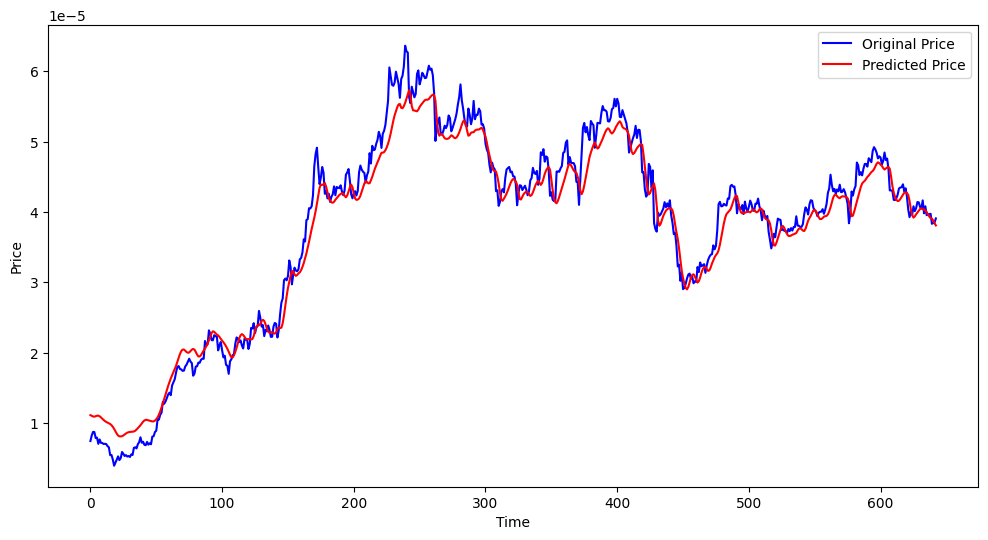

In [54]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label ='Original Price')
plt.plot(y_pred, 'r', label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()